## 타이타닉 시각화

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


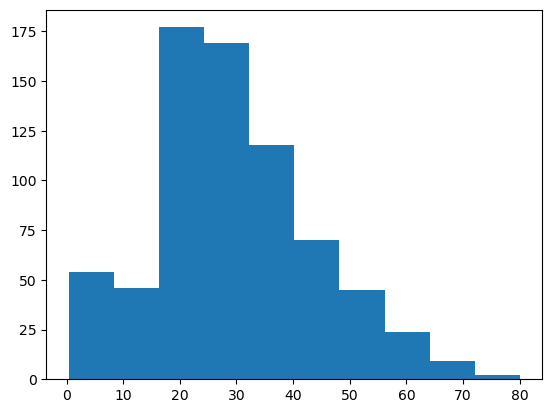

In [35]:
# Age - 데이터의 분포를 볼 때는 histogram
plt.hist(df['Age'])
plt.show()

<Axes: >

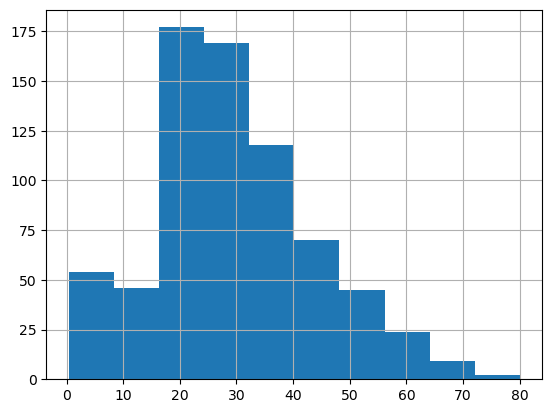

In [36]:
df['Age'].hist()

<Axes: xlabel='Age', ylabel='Count'>

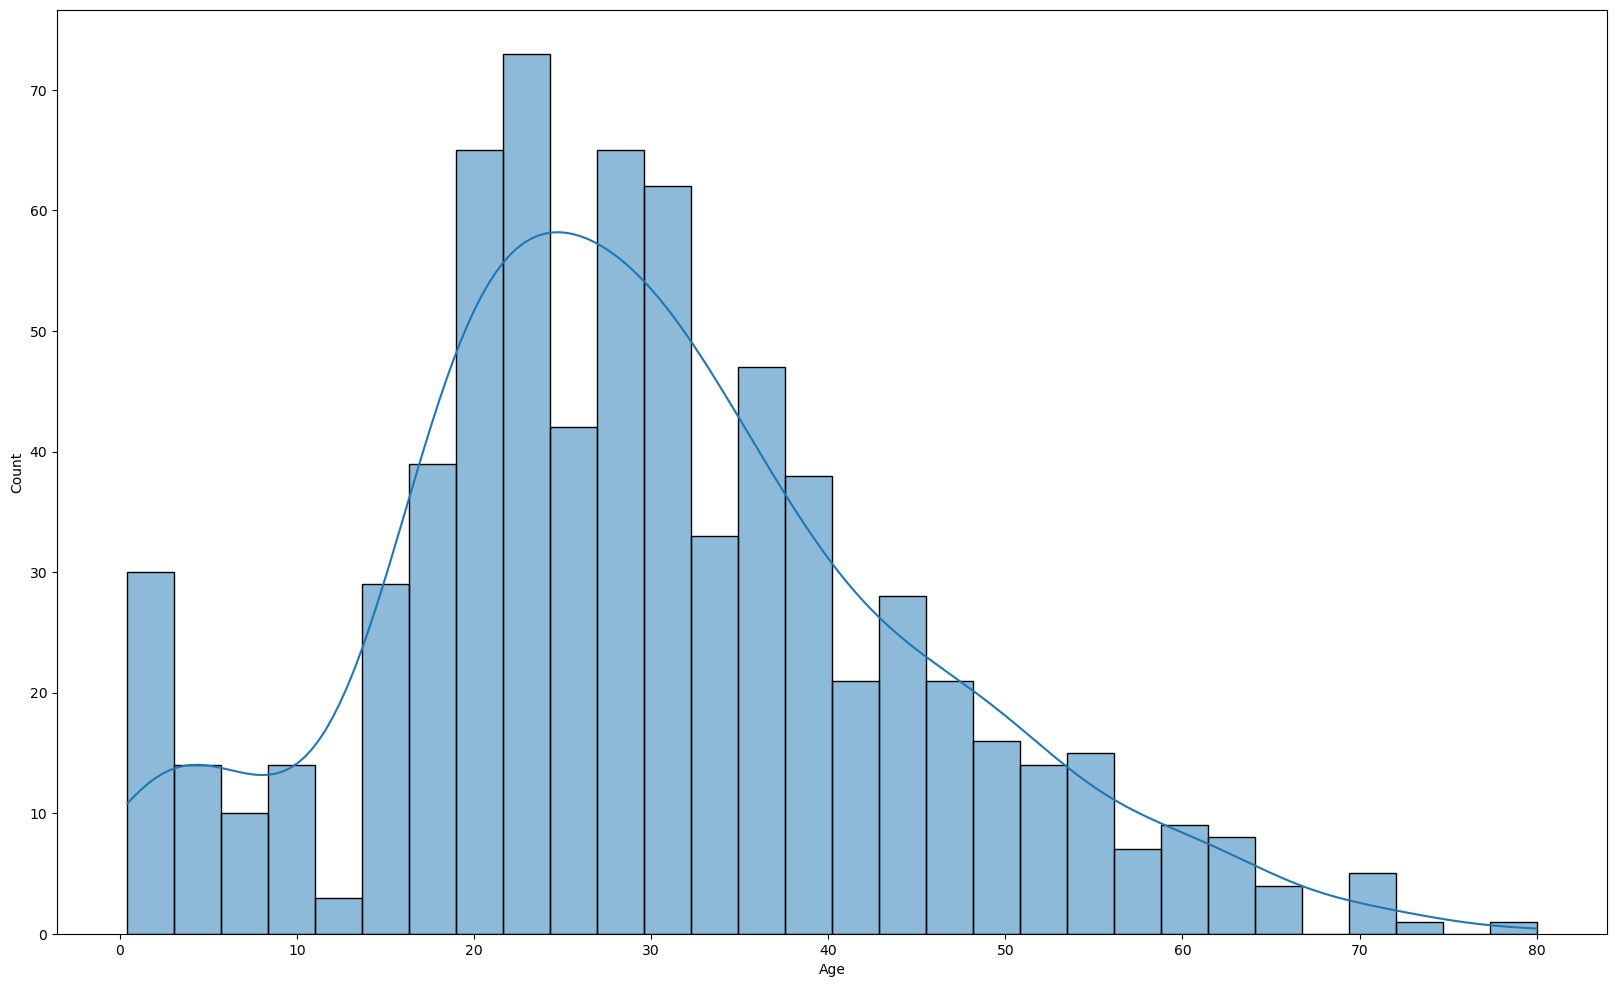

In [37]:
plt.figure(figsize=(20,12))
sns.histplot(data=df['Age'], bins=30, kde=True)

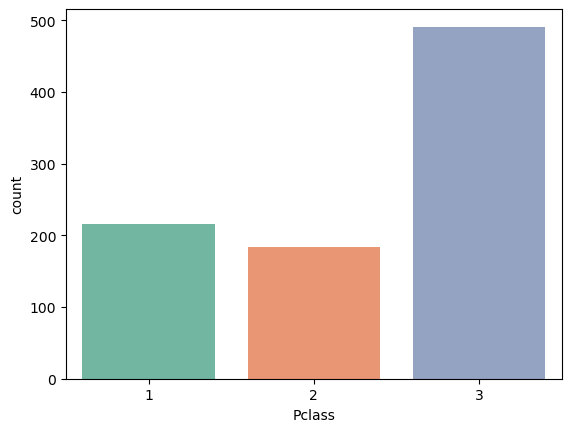

In [38]:
df['Pclass'].value_counts()
sns.countplot(data=df, x='Pclass', palette="Set2")
plt.show()

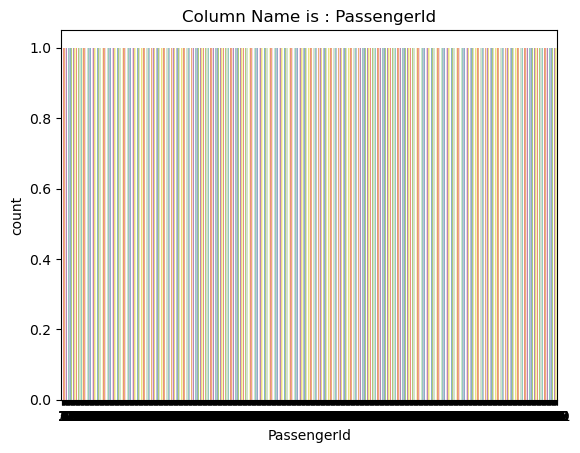

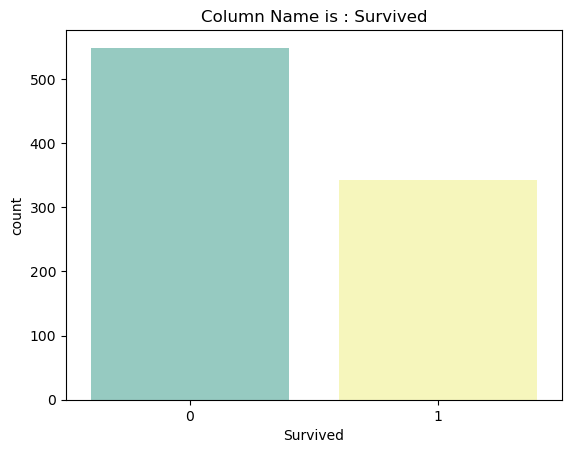

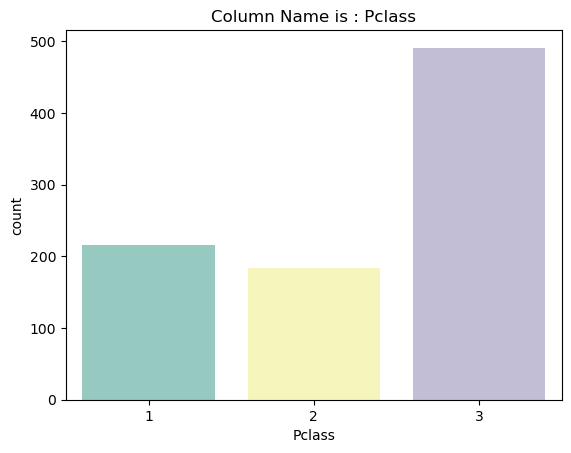

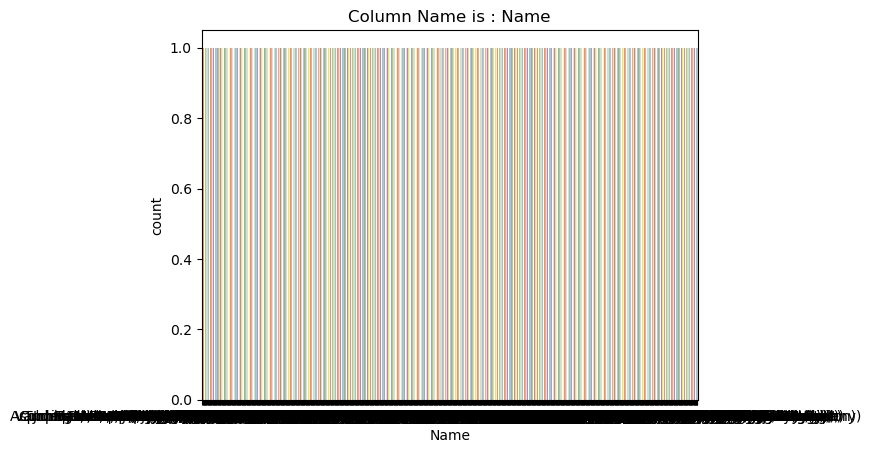

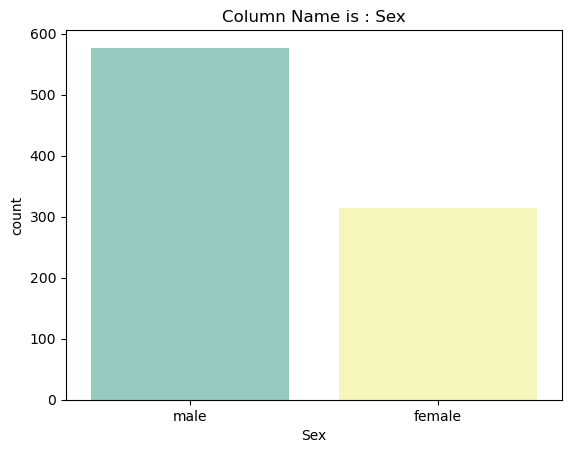

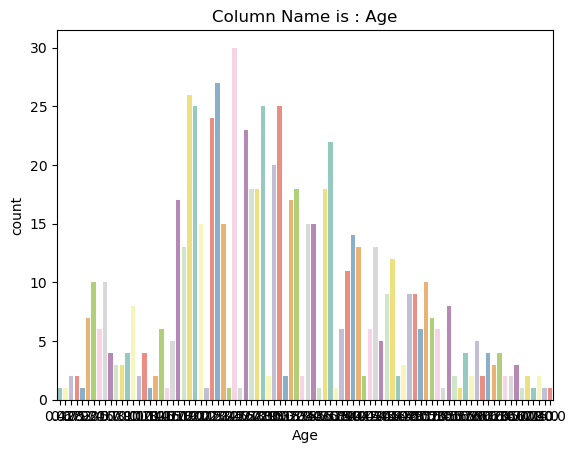

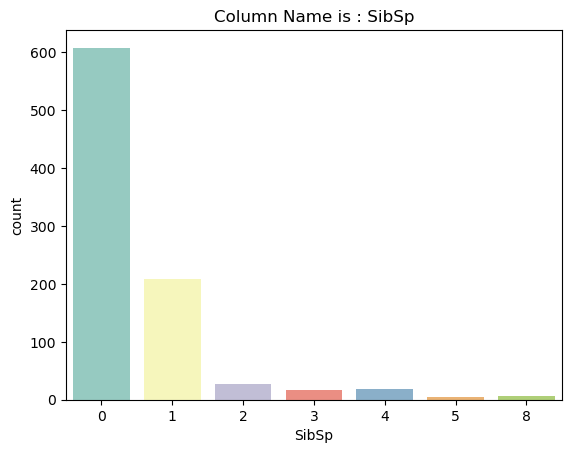

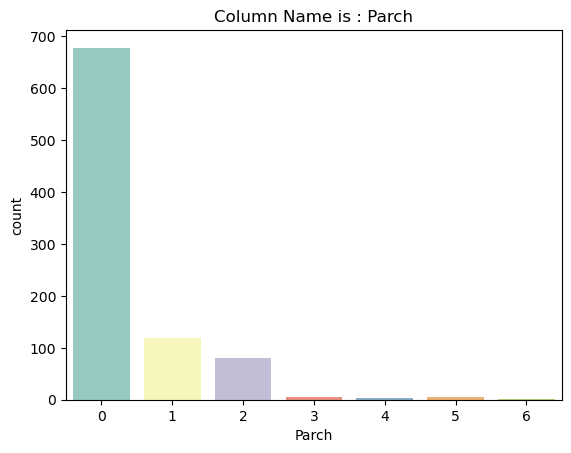

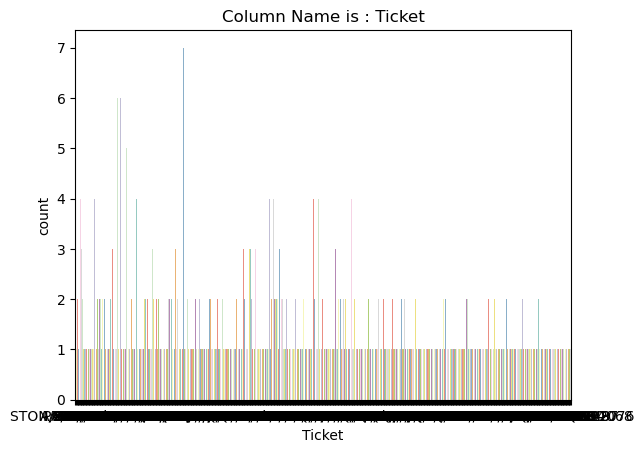

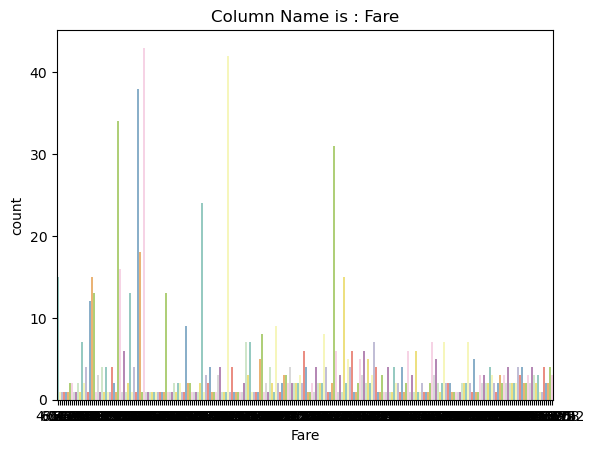

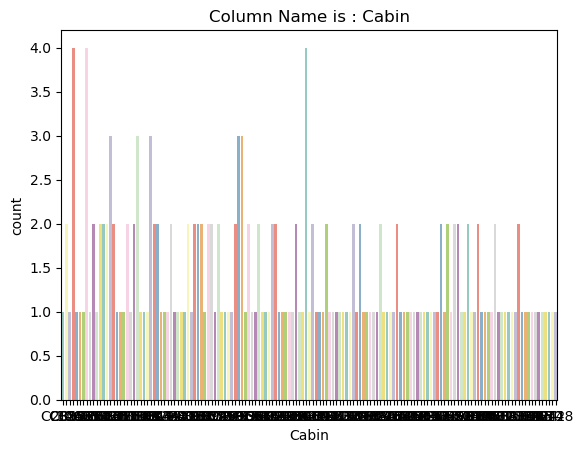

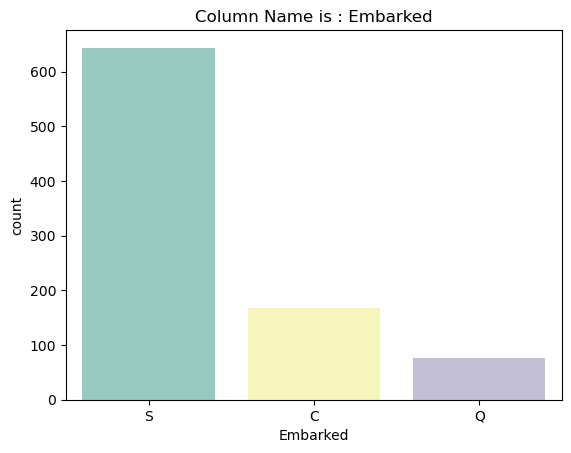

In [39]:
for col in df.columns:
    sns.countplot(data=df, x=col, palette="Set3")
    plt.title(f"Column Name is : {col}")
    plt.show()

In [40]:
# sns.barplot(data=df, x='Embarked', y='Survived')
df = pd.read_csv()
label = 'Survived'

for col in df.columns:
    sns.barplot(data=df, x=col, y=label, hue='Sex')
    plt.title("Col : " + col)
    plt.show()

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [41]:
def age_group(age):
    if age <= 10: group='baby'
    elif age <= 20: group='student'
    elif age <= 35: group='young adult'    
    elif age <= 60: group='adult'
    else: group='senior'
        
    return group

<Axes: xlabel='Age_Group', ylabel='Survived'>

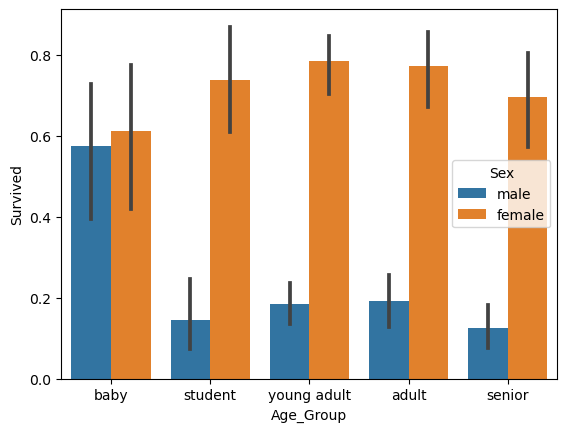

In [42]:
df['Age_Group'] = df['Age'].apply(age_group)

orders = ['baby', 'student', 'young adult', 'adult', 'senior']
sns.barplot(data=df, x='Age_Group', y='Survived', order=orders, hue='Sex')

<Axes: xlabel='Sex', ylabel='Survived'>

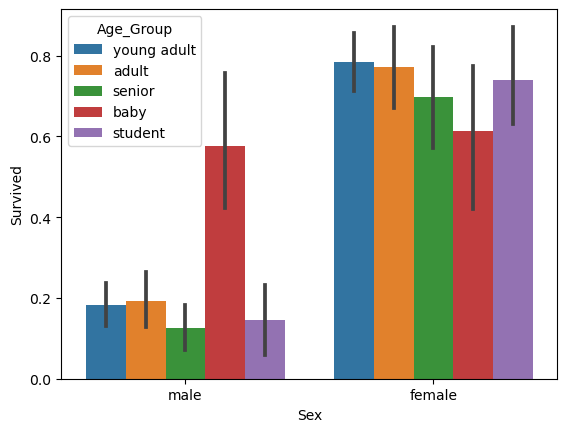

In [43]:
# 여성과 남성 각각에 대한 나이 그룹을 보고 싶어요.
sns.barplot(data=df, x='Sex', y='Survived', hue='Age_Group')

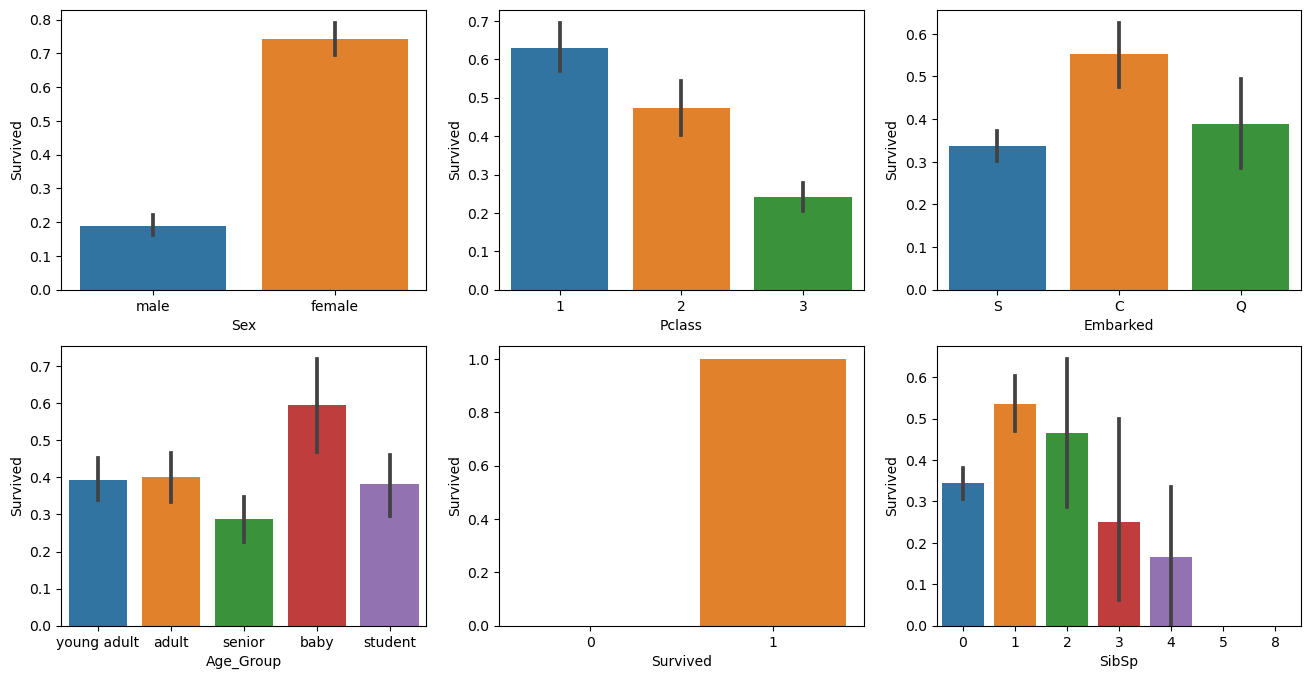

In [44]:
# subplots
columns = ['Sex', 'Pclass', 'Embarked', 'Age_Group', 'Survived', 'SibSp']

# fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16,8))
# fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
# ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

for index, col in enumerate(columns):
    sns.barplot(data=df, x=col, y='Survived', ax=ax[index // 3, index % 3])

In [60]:
## 서울시 인구 현황 데이터
df = pd.read_excel('data/seoul_popular.xlsx', header=2, usecols='B,D,G,J,N')
#df.head(3)

# columns 인덱스 재설정
df.columns = ['구', '전체인구', '한국인', '외국인', '인구밀도'] # (명/㎢)
#df.head(3)

# 소계 전체 부분 제외
df = df.drop(0)
#df.head(3)

# 인덱스 0부터 시작
df = df.reset_index()
df = df.drop('index', axis=1)
df.head(3)

c:\Users\3mink\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구,전체인구,한국인,외국인,인구밀도
0,종로구,151349,140397,10952,28383
1,중구,132054,121441,10613,25546
2,용산구,232069,217288,14781,39717


In [65]:
# 한국인 비율, 외국인 비율
df['외국인비율'] = round((df['외국인'] / df['전체인구']) * 100, 1)
# df.head(3)

df.sort_values(by='외국인비율', ascending=False).head(3)

,구,전체인구,한국인,외국인,인구밀도,외국인비율
1,중구,132054,121441,10613,25546,8.0
0,종로구,151349,140397,10952,28383,7.2
2,용산구,232069,217288,14781,39717,6.4


In [66]:
# 한국인 비율, 외국인 비율
df['한국인비율'] = round((df['한국인'] / df['전체인구']) * 100, 1)
# df.head(3)

df.sort_values(by='한국인비율', ascending=False).head(3)

,구,전체인구,한국인,외국인,인구밀도,외국인비율,한국인비율
14,양천구,441517,438353,3164,74386,0.7,99.3
9,도봉구,311386,308986,2400,68682,0.8,99.2
24,강동구,463005,458953,4052,80589,0.9,99.1


In [67]:
# 한국인, 외국인

df.sort_values(by='한국인', ascending=False).head(3)

,구,전체인구,한국인,외국인,인구밀도,외국인비율,한국인비율
23,송파구,662872,657101,5771,106281,0.9,99.1
15,강서구,572382,566839,5543,99690,1.0,99.0
22,강남구,542327,537139,5188,84271,1.0,99.0


In [68]:
# 한국인, 외국인

df.sort_values(by='외국인', ascending=False).head(3)

,구,전체인구,한국인,외국인,인구밀도,외국인비율,한국인비율
16,구로구,417774,394833,22941,78150,5.5,94.5
18,영등포구,398842,376139,22703,66362,5.7,94.3
5,동대문구,355667,338115,17552,65657,4.9,95.1


<BarContainer object of 10 artists>

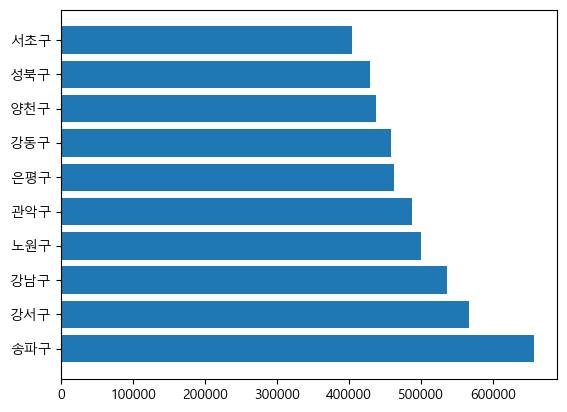

In [72]:
# 한국인 인구 순으로 top10 데이터를 막대 그래프로 시각화하기

df_high_popular = df.sort_values(by='한국인', ascending=False).head(10)
plt.rc('font', family='Malgun Gothic')
plt.barh(df_high_popular['구'], df_high_popular['한국인'])

<Axes: xlabel='구', ylabel='한국인'>

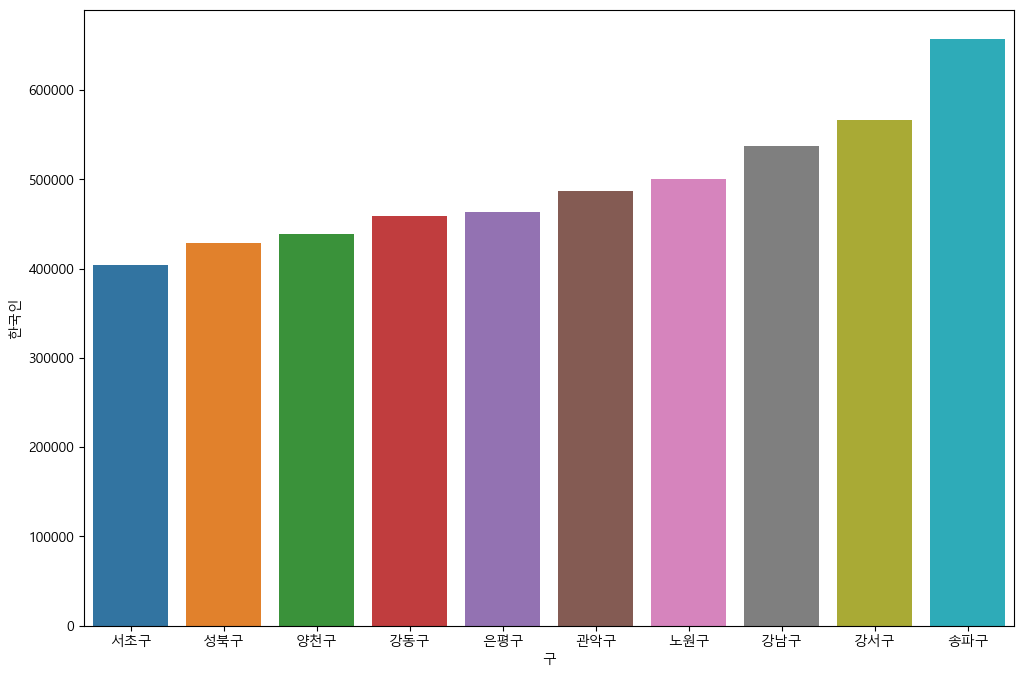

In [76]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_high_popular[::-1], x='구', y='한국인')

# 부동산 데이터

In [79]:
# 부동산 데이터
df_1 = pd.read_excel('data/2013.xlsx')
df_2 = pd.read_excel('data/2019.xlsx')

In [82]:
df_2.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

In [88]:
df_2['분양가격(㎡)'].isna().sum()
df_2['분양가격'] = pd.to_numeric(df_2['분양가격(㎡)'], errors="coerce")

In [89]:
df_2['분양가격'] = df_2['분양가격'] * 3.3
df_2.head(3)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,전체,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6


In [90]:
def str_parser(word):
    # word = '전용면적 60㎡초과 85㎡이하'
    word = word.replace("전용면적", '')
    word = word.replace("이하", '')
    word = word.replace("초과", '~')
    word = word.replace(" ", '')
    word = word.replace("㎡", '')
    return word

In [92]:
df_2['규모구분'] = df_2['규모구분'].apply(str_parser)
df_2 = df_2.drop(columns="분양가격(㎡)")


KeyError: "['분양가격(㎡)'] not found in axis"

In [93]:
df_2_all = df_2[df_2['규모구분'] == '전체']

In [94]:
df_2_all

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,19275.3
5,인천,전체,2015,10,10437.9
10,경기,전체,2015,10,10355.4
15,부산,전체,2015,10,10269.6
20,대구,전체,2015,10,8850.6
...,...,...,...,...,...
4310,전북,전체,2019,12,8144.4
4315,전남,전체,2019,12,8091.6
4320,경북,전체,2019,12,9616.2
4325,경남,전체,2019,12,10107.9


In [97]:
df_1 = df_1.melt(id_vars=['지역'], var_name='기간', value_name='분양가격')

In [106]:
df_1.head(3)

,지역,기간,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080


In [107]:
def make_year(data):
    year = data.split('년')[0]
    return year
def make_month(data):
    month = data.split('년')[1].replace("월", '')
    return month

In [108]:
df_1['연도'] = df_1['기간'].apply(make_year)
df_1['월'] = df_1['기간'].apply(make_month)
df_1.head(3)

,지역,기간,분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12


In [109]:
df_1 = df_1.drop(columns='기간')
df_1.head(3), len(df_1)

,지역,분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12


In [114]:
df_2_all = df_2_all.drop(columns='규모구분')
df_2_all.columns = ['지역', '연도', '월', '분양가격']
df_2_all.head(3), len(df_2_all)

,지역,연도,월,분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4


In [117]:
pd.concat([df_1, df_2_all]).reset_index().drop(columns='index')

,지역,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
1219,전북,8144.4,2019,12
1220,전남,8091.6,2019,12
1221,경북,9616.2,2019,12
1222,경남,10107.9,2019,12


In [118]:
df_1.head(3), len(df_1)

(   지역   분양가격    연도   월
 0  서울  18189  2013  12
 1  부산   8111  2013  12
 2  대구   8080  2013  12,
 357)

In [119]:
df_2_all.head(3), len(df_2_all)

(    지역    연도   월     분양가격
 0   서울  2015  10  19275.3
 5   인천  2015  10  10437.9
 10  경기  2015  10  10355.4,
 867)